In [1]:
#Bibliotecas utilizadas
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import numpy as np
from wordcloud import WordCloud
import nltk
import datetime as dt
from nltk import FreqDist
from nltk.tokenize import sent_tokenize
from textblob.classifiers import NaiveBayesClassifier
from textblob import TextBlob
import re
%config InlineBackend.rc={'figure.figsize': (16, 14)}
%config InlineBackend.figure_format='retina'
import scipy.stats as stats

In [6]:
#Definição de funções úteis
def RemoviStopWords(instancia):
    instancia = instancia.lower()
    stopwords = set(nltk.corpus.stopwords.words('english'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))
def Pre_Processing_data(frase):
    temp = frase
    temp = re.sub(r'[-./?!,":;()\'+*#&]',' ',temp)
    temp = re.sub('[-|0-9]',' ', temp)
    temp = RemoviStopWords(temp)
    return (temp)

In [3]:
#Leitura dos dados
msgs = pd.read_csv("SMS_Senior.csv",encoding = "ISO-8859-1")

,Full_Text,got,great,wat,free,text,txt,win,already,dun,...,number,wish,leave,thing,many,wan,Common_Word_Count,Word_Count,Date,IsSpam
0,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,12,2017-01-01 00:08:00,no
1,"came to look at the flat, seems ok, in his 50s...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,23,2017-01-01 00:19:00,no
2,Urgent! call 09061749602 from Landline. Your c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,25,2017-01-01 01:53:00,yes
3,Do you hide anythiing or keeping distance from me,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,2017-01-01 02:14:00,no
4,"Actually, my mobile is full of msg. And i m do...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,29,2017-01-01 02:25:00,no


In [4]:
#Selecionando apenas os dados que contém a data de recebimento das mensagens
d_time = pd.to_datetime(msgs["Date"])
d_week = d_time.dt.weekday_name
df_month = d_time.dt.month
count_msgs_month = Counter(df_month)


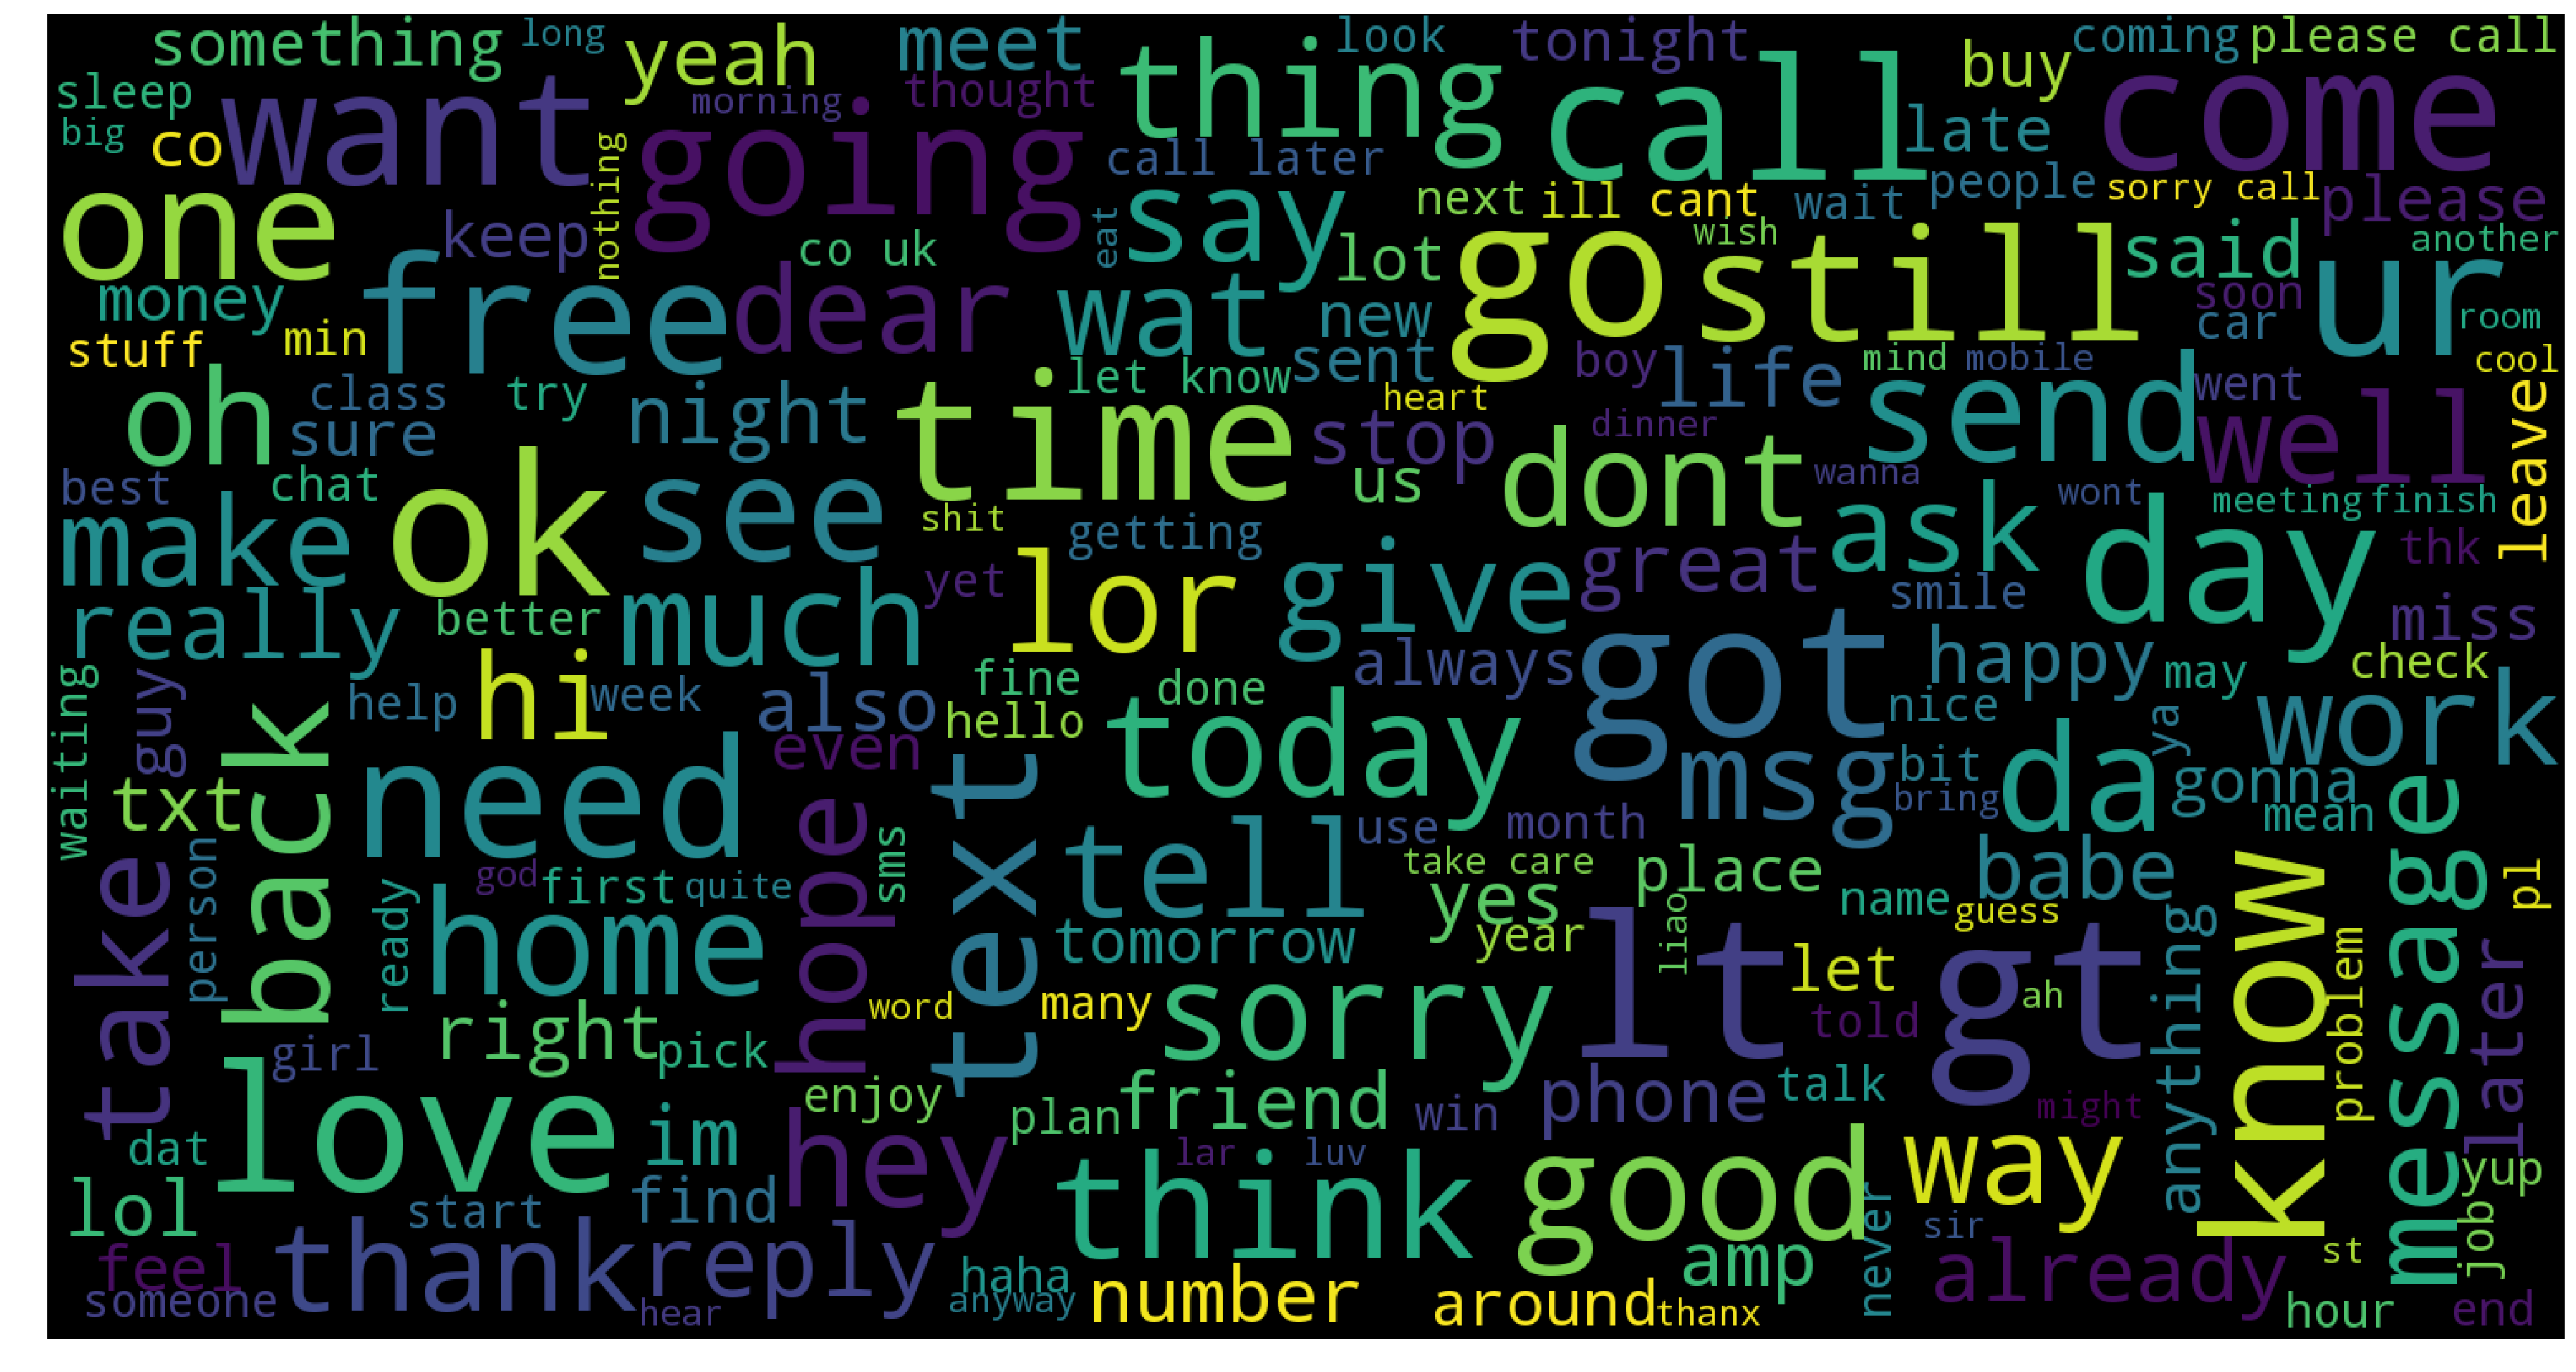

In [5]:
#Pré processamento dos dados
#Stop Words e Stemming
Full_Msgs = list(msgs["Full_Text"])#Selecionando apenas o texto completo das mensagens
Full_Msgs = ' '.join(Full_Msgs)
Full_Msgs = re.sub(r'[-./?!,":;()\'+*#&£]',' ',Full_Msgs)#Retirando caracteres especiais
#nltk.download('popular')
Full_Msgs = re.sub('[-|0-9]',' ', Full_Msgs)
Full_Msgs = RemoviStopWords(Full_Msgs)#Removendo palavras de parada in, the, and...
#====================================================
#Inicio da Primeira Etapa
#====================================================
#1- Gráfico de nuvem de palavras
#Criação da nuvem de palavras
wordcloud = WordCloud(max_font_size=120,width = 1520, height = 800).generate(Full_Msgs)
plt.figure(figsize=(32,18))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [7]:
#2 - Contagem de palavras comuns e spam
col_Is_Spam = msgs["IsSpam"] #Selecionando apenas a coluna de classificação das palavras
#Inicializando contadores de mensagens spam e não spam
spam_msg_count_Jan = 0
com_msg_count_Jan = 0

spam_msg_count_Feb = 0
com_msg_count_Feb = 0

spam_msg_count_Mar = 0
com_msg_count_Mar = 0
#Realizando a contagem de mensagens classificadas como spam ou não por cada mês
testando = Counter(col_Is_Spam)
for ind in range(len(col_Is_Spam)):
    if df_month[ind] == 1:
        if col_Is_Spam[ind] == "yes":
            spam_msg_count_Jan = spam_msg_count_Jan + 1
        else:
            com_msg_count_Jan = com_msg_count_Jan + 1
    elif df_month[ind] == 2:
        if col_Is_Spam[ind] == "yes":
            spam_msg_count_Feb = spam_msg_count_Feb + 1
        else:
            com_msg_count_Feb = com_msg_count_Feb + 1
    elif df_month[ind] == 3:
        if col_Is_Spam[ind] == "yes":
            spam_msg_count_Mar = spam_msg_count_Mar + 1
        else:
            com_msg_count_Mar = com_msg_count_Mar + 1
print("A quantidade de mensagens comuns no mês de Janeiro foi: " ,com_msg_count_Jan)
print("A quantidade de Spams no mês de Janeiro foi: " ,spam_msg_count_Jan)
print("A quantidade de mensagens comuns no mês de Fevereiro foi: " ,com_msg_count_Feb)
print("A quantidade de Spams comuns no mês de Fevereiro foi: " ,spam_msg_count_Feb)
print("A quantidade de mensagens comuns no mês de Março foi: " ,com_msg_count_Mar)
print("A quantidade de Spams comuns no mês de Março foi: " ,spam_msg_count_Mar)

A quantidade de mensagens comuns no mês de Janeiro foi:  1687
A quantidade de Spams no mês de Janeiro foi:  266
A quantidade de mensagens comuns no mês de Fevereiro foi:  1512
A quantidade de Spams comuns no mês de Fevereiro foi:  244
A quantidade de mensagens comuns no mês de Março foi:  1628
A quantidade de Spams comuns no mês de Março foi:  237


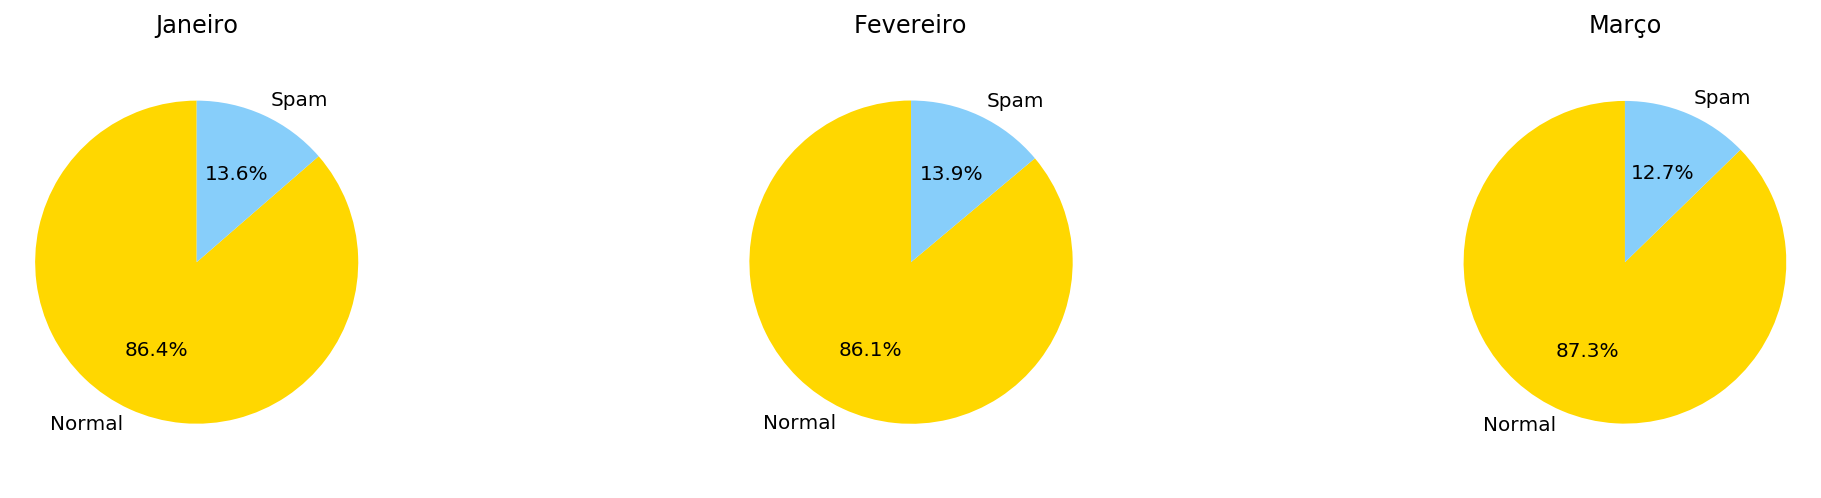

In [8]:
#Criação do gráfico do item 2 - exercício da primeira etapa
Janeiro = [com_msg_count_Jan,spam_msg_count_Jan]
Fevereiro = [com_msg_count_Feb,spam_msg_count_Feb]
Marco = [com_msg_count_Mar,spam_msg_count_Mar]

fig, eixos = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
pie_1 = eixos[0].pie(Janeiro, labels=['Normal','Spam'],
                    autopct='%1.1f%%', startangle=90, colors=['gold', 'lightskyblue'])
eixos[0].set_title('Janeiro')
eixos[0].axis('equal')
pie_2 = eixos[1].pie(Fevereiro, labels=['Normal','Spam'], 
                    autopct='%1.1f%%', startangle=90, colors=['gold', 'lightskyblue'])
eixos[1].set_title('Fevereiro')
eixos[1].axis('equal')

pie_3 = eixos[2].pie(Marco, labels=['Normal','Spam'], 
                    autopct='%1.1f%%', startangle=90, colors=['gold', 'lightskyblue'])
eixos[2].set_title('Março')
plt.axis('equal')
plt.subplots_adjust(wspace=1)
plt.show()

In [9]:
#3 - Exibição dos dados Estatísticos - média, mediana, desvio padrão, variância...
word_count = msgs["Word_Count"]
n_jan = []
n_feb = []
n_mar = []
n_jan_not = []
n_feb_not = []
n_mar_not = []
#Separação das mensagens por mê
for ind in range(len(col_Is_Spam)):
    if df_month[ind] == 1:
        n_jan.append(word_count[ind])
        n_jan_not.append(word_count[ind])
    elif df_month[ind] == 2:
        n_feb.append(word_count[ind])
        n_feb_not.append(word_count[ind])
    elif df_month[ind] == 3:
        n_mar.append(word_count[ind])
        n_mar_not.append(word_count[ind])

n_jan.sort()
n_feb.sort()
n_mar.sort()

n_jan = pd.DataFrame(n_jan)

n_feb = pd.DataFrame(n_feb)

n_mar = pd.DataFrame(n_mar)


#Calcular o máximo, o mínimo, a média, a mediana, o desvio
#padrão e a variância da quantidade total de palavras
#(Word_Count) para cada mês;
print ("A quantidade máxima de palavras em uma mensagem no mês de Janeiro foi de ",int(round(n_jan.max()))," Palavras")
print ("A quantidade mínima de palavras em uma mensagem no mês de Janeiro foi de ",int(round(n_jan.min()))," Palavras")
print ("A média de palavras em uma mensagem no mês de Janeiro foi de aproximadamente ",int(round(n_jan.mean()))," Palavras")
print ("A mediana de palavras em uma mensagem no mês de Janeiro foi de aproximadamente: ",int(round(n_jan.median()))," Palavras")
print ("O desvio padrão de palavras no mês de Janeiro foi de aproximadamente: ",int(round(n_jan.std())))
print ("A variância no mês de Janeiro foi de aproximadamente: ",int(round(n_jan.var())))
print("")
print ("A quantidade máxima de palavras em uma mensagem no mês de Fevereiro foi de ",int(round(n_feb.max()))," Palavras")
print ("A quantidade mínima de palavras em uma mensagem no mês de Fevereiro foi de ",int(round(n_feb.min()))," Palavras")
print ("A média de palavras em uma mensagem no mês de Fevereiro foi de aproximadamente ",int(round(n_feb.mean()))," Palavras")
print ("A mediana de palavras em uma mensagem no mês de Fevereiro foi de aproximadamente: ",int(round(n_feb.median()))," Palavras")
print ("O desvio padrão de palavras no mês de Fevereiro foi de aproximadamente: ",int(round(n_feb.std())))
print ("A variância no mês de Fevereiro foi de aproximadamente: ",int(round(n_feb.var())))
print("")
print ("A quantidade máxima de palavras em uma mensagem no mês de Março foi de ",int(round(n_mar.max()))," Palavras")
print ("A quantidade mínima de palavras em uma mensagem no mês de Março foi de ",int(round(n_mar.min()))," Palavras")
print ("A média de palavras em uma mensagem no mês de Março foi de aproximadamente ",int(round(n_mar.mean()))," Palavras")
print ("A mediana de palavras em uma mensagem no mês de Março foi de aproximadamente: ",int(round(n_mar.median()))," Palavras")
print ("O desvio padrão no mês de Março foi de aproximadamente: ",int(round(n_mar.std())))
print ("A variância no mês de Março foi de aproximadamente: ",int(round(n_mar.var())))
print("")



A quantidade máxima de palavras em uma mensagem no mês de Janeiro foi de  190  Palavras
A quantidade mínima de palavras em uma mensagem no mês de Janeiro foi de  2  Palavras
A média de palavras em uma mensagem no mês de Janeiro foi de aproximadamente  16  Palavras
A mediana de palavras em uma mensagem no mês de Janeiro foi de aproximadamente:  13  Palavras
O desvio padrão de palavras no mês de Janeiro foi de aproximadamente:  13
A variância no mês de Janeiro foi de aproximadamente:  158

A quantidade máxima de palavras em uma mensagem no mês de Fevereiro foi de  100  Palavras
A quantidade mínima de palavras em uma mensagem no mês de Fevereiro foi de  2  Palavras
A média de palavras em uma mensagem no mês de Fevereiro foi de aproximadamente  16  Palavras
A mediana de palavras em uma mensagem no mês de Fevereiro foi de aproximadamente:  13  Palavras
O desvio padrão de palavras no mês de Fevereiro foi de aproximadamente:  11
A variância no mês de Fevereiro foi de aproximadamente:  122

A 

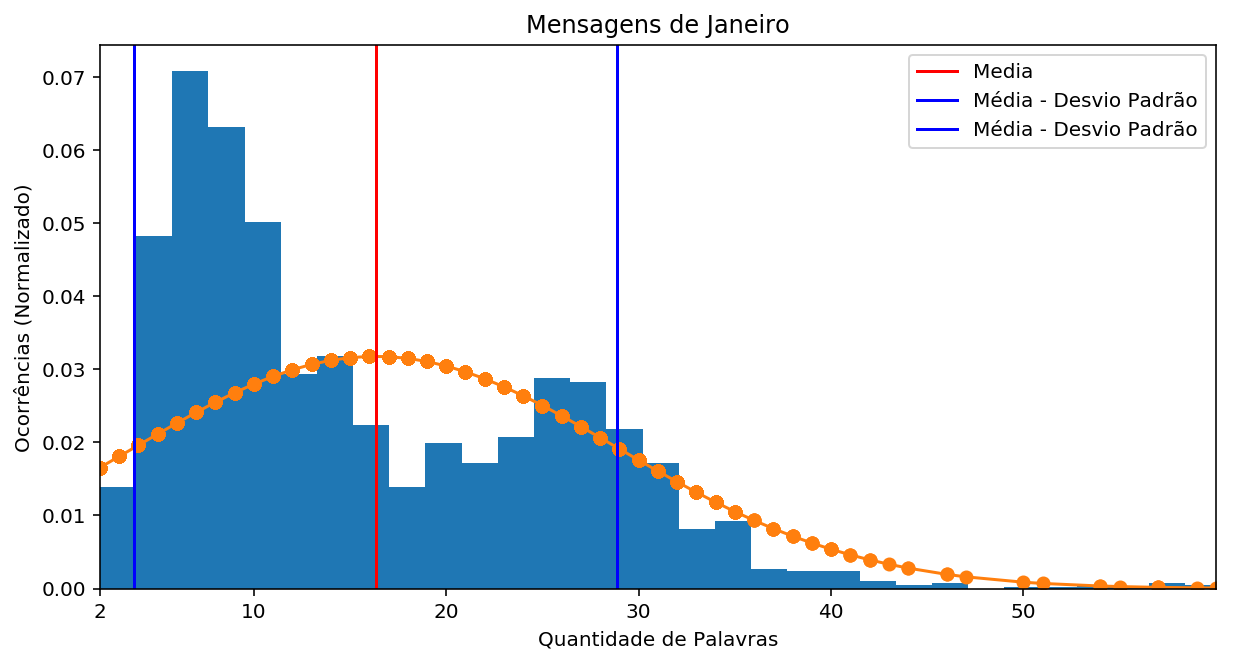

In [17]:
#Conitnuação do item 3 - Primeira etapa
#Plotagem de histogramas de frequências de mensagens com mesmo tamanho para realizar 
#análises estatisticas através dos gráficos utilizando média, desvio padrão
#Mês de Janeiro
freq = Counter(n_jan)
ocorrencias = []
q_words = []
m=[]
[m.extend([k,v]) for k,v in freq.items()]
value_crimes = []
keys_crimes = []
for ind in range(len(m)):
    if ind % 2 == 0:
        q_words.append(m[ind])
    else:
        ocorrencias.append(m[ind])
plt.figure(figsize=(10,5))
plt.hist(n_jan, bins = 100, normed=1)
fit = stats.norm.pdf(n_jan, n_jan.mean(), n_jan.std())  #this is a fitting indeed
plt.plot(n_jan,fit,'-o')
plt.axvline(x=float(n_jan.mean()), color='r', linestyle='-',label = 'Media')
plt.axvline(x=float(n_jan.mean()+n_jan.std()), color='b', linestyle='-',label = 'Média - Desvio Padrão')
plt.axvline(x=float(n_jan.mean()-n_jan.std()), color='b', linestyle='-',label = 'Média - Desvio Padrão')
plt.xlim(xmin = 2)
plt.xlim(xmax = 60)
plt.xticks([2,10,20,30,40,50])
plt.legend()
plt.title("Mensagens de Janeiro")
plt.xlabel("Quantidade de Palavras")
plt.ylabel("Ocorrências (Normalizado)")
plt.show()
plt.close()

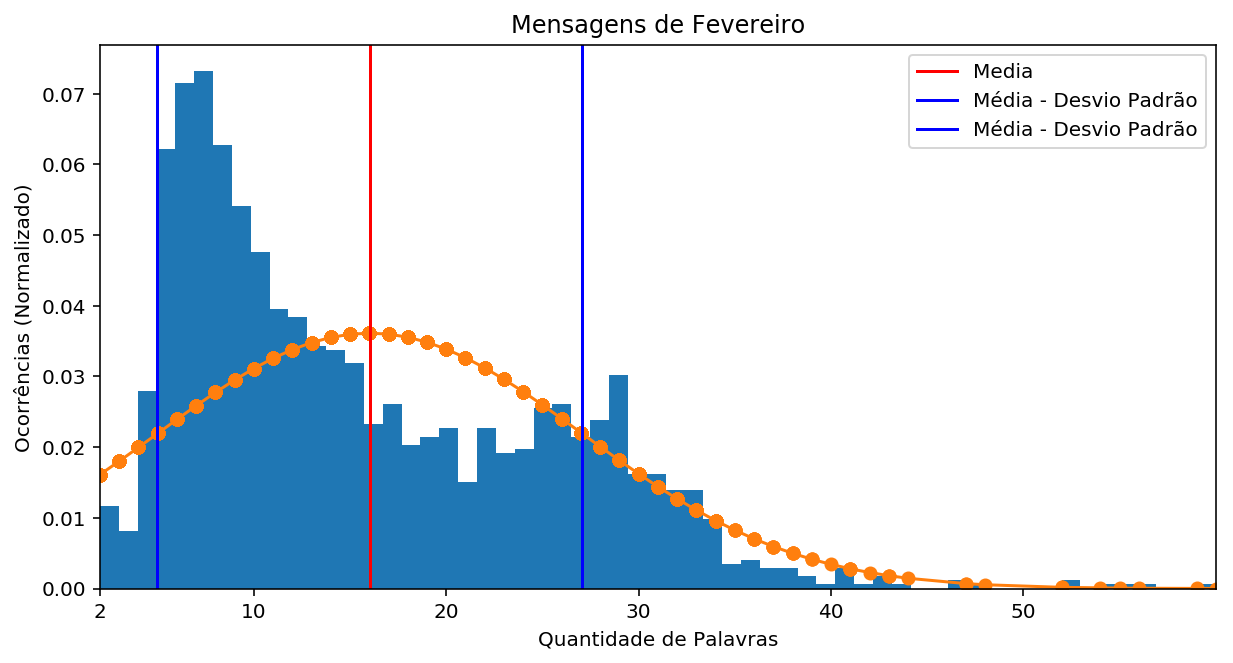

In [18]:
#Mês de Fevereiro
freq = Counter(n_feb)
ocorrencias = []
q_words = []
m=[]
[m.extend([k,v]) for k,v in freq.items()]
value_crimes = []
keys_crimes = []
for ind in range(len(m)):
    if ind % 2 == 0:
        q_words.append(m[ind])
    else:
        ocorrencias.append(m[ind])   
plt.figure(figsize=(10,5))
plt.hist(n_feb, bins = 100, normed=1)
fit = stats.norm.pdf(n_feb, n_feb.mean(), n_feb.std())  #this is a fitting indeed
plt.plot(n_feb,fit,'-o')
plt.axvline(x=float(n_feb.mean()), color='r', linestyle='-',label = 'Media')
plt.axvline(x=float(n_feb.mean()+n_feb.std()), color='b', linestyle='-',label = 'Média - Desvio Padrão')
plt.axvline(x=float(n_feb.mean()-n_feb.std()), color='b', linestyle='-',label = 'Média - Desvio Padrão')
plt.xlim(xmin = 2)
plt.xlim(xmax = 60)
plt.xticks([2,10,20,30,40,50])
plt.legend()
plt.title("Mensagens de Fevereiro")
plt.xlabel("Quantidade de Palavras")
plt.ylabel("Ocorrências (Normalizado)")
plt.show()
plt.close()

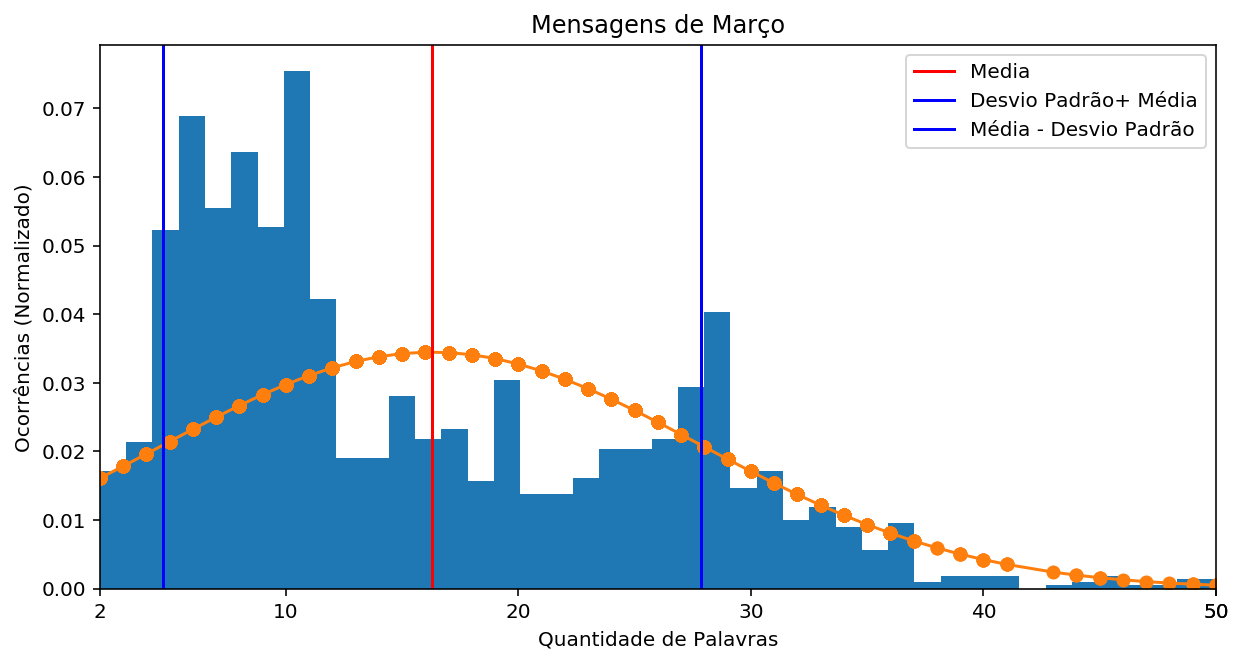

In [19]:
#Mês de Março
freq = Counter(n_mar)
ocorrencias = []
q_words = []
m=[]
[m.extend([k,v]) for k,v in freq.items()]
value_crimes = []
keys_crimes = []
for ind in range(len(m)):
    if ind % 2 == 0:
        q_words.append(m[ind])
    else:
        ocorrencias.append(m[ind])
plt.figure(figsize=(10,5))
plt.hist(n_mar, bins = 100, normed=1)
fit = stats.norm.pdf(n_mar, n_mar.mean(), n_mar.std())
plt.plot(n_mar,fit,'-o')
plt.axvline(x=float(n_mar.mean()), color='r', linestyle='-',label = 'Media')
plt.axvline(x=float(n_mar.mean()+n_mar.std()), color='b', linestyle='-',label = 'Desvio Padrão+ Média')
plt.axvline(x=float(n_mar.mean()-n_mar.std()), color='b', linestyle='-',label = 'Média - Desvio Padrão')
plt.xlim(xmin = 2)
plt.xlim(xmax = 50)
plt.xticks([2,10,20,30,40,50,50])
plt.legend()
plt.title("Mensagens de Março")
plt.xlabel("Quantidade de Palavras")
plt.ylabel("Ocorrências (Normalizado)")
plt.show()
plt.close()

In [20]:
#4 - Dia de cada mês em que foram recebidos mais mensagens
Com_msgs = msgs[msgs.IsSpam != 'yes'] #Pegando apenas as mensagens comuns do conjunto de dados
spam_msgs = msgs[msgs.IsSpam != 'no'] #Pegando apenas as mensagens spams do conjunto de dados
Com_msgs = Com_msgs.reset_index(drop=True) #Resetando os indices das linhas da base de dados
spam_msgs = spam_msgs.reset_index(drop=True)

d_com_msgs = pd.to_datetime(Com_msgs["Date"])#Selecionando apenas as datas de recebimento de mensagens no padrão YY-MM-DD HH:MM:SS
df_month_com = d_com_msgs.dt.month
d_com_msgs = list(d_com_msgs)
date = []
#Selecionando apenas a data, retirando a hora. 
for ind in range(len(d_com_msgs)):
    temp_string = str(d_com_msgs[ind])
    temp_string = temp_string.split()
    for i in range(len(temp_string)):
        if i == 0:
            date.append(temp_string[i])
            break

C_Jan = []
C_Feb = []
C_Mar = []
#Separando as datas por mês
for ind in range(len(d_com_msgs)):
    if df_month_com[ind] == 1 :
        C_Jan.append(date[ind])
    elif df_month_com[ind] == 2 :
        C_Feb.append(date[ind])
    elif df_month_com[ind] == 3:
        C_Mar.append(date[ind])
#Selecionando o dia em que mais foram recebidos mensagens em cada mês
com_jan = Counter(C_Jan).most_common(1)
com_feb = Counter(C_Feb).most_common(1)
com_mar = Counter(C_Mar).most_common(1)
print("O dia que mais foi recebido mensagens comuns no mês de Janeiro foi: ",com_jan[0][0]," com ",com_jan[0][1]," ocorrências")
print("O dia que mais foi recebido mensagens comuns no mês de Fevereiro foi: ",com_feb[0][0]," com ",com_feb[0][1]," ocorrências")
print("O dia que mais foi recebido mensagens comuns no mês de Março foi: ",com_mar[0][0]," com ",com_mar[0][1]," ocorrências")
Count_Jan = Counter(C_Jan)
Count_Feb = Counter(C_Feb)
Count_Mar = Counter(C_Mar)



O dia que mais foi recebido mensagens comuns no mês de Janeiro foi:  2017-01-01  com  69  ocorrências
O dia que mais foi recebido mensagens comuns no mês de Fevereiro foi:  2017-02-13  com  72  ocorrências
O dia que mais foi recebido mensagens comuns no mês de Março foi:  2017-03-08  com  69  ocorrências


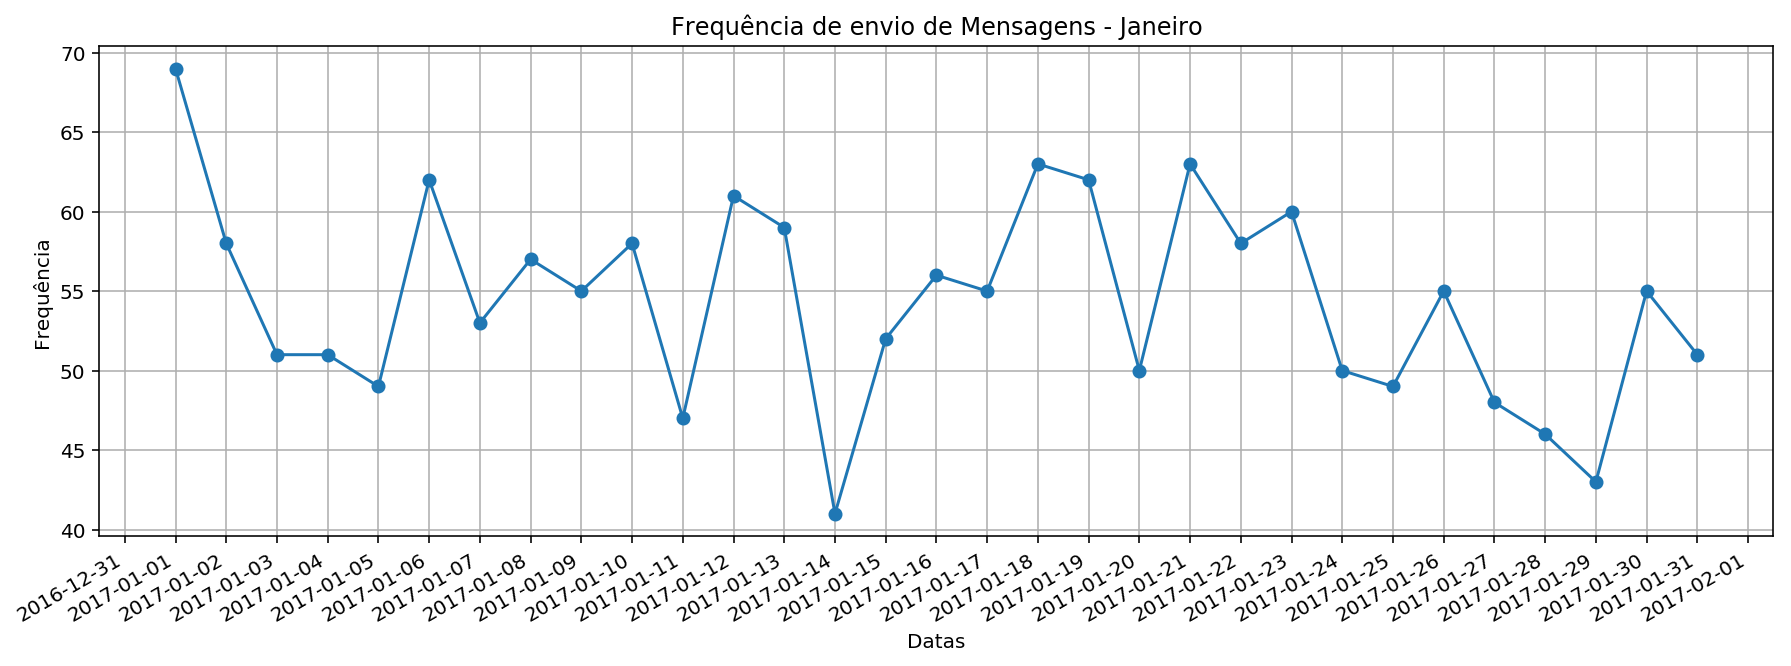

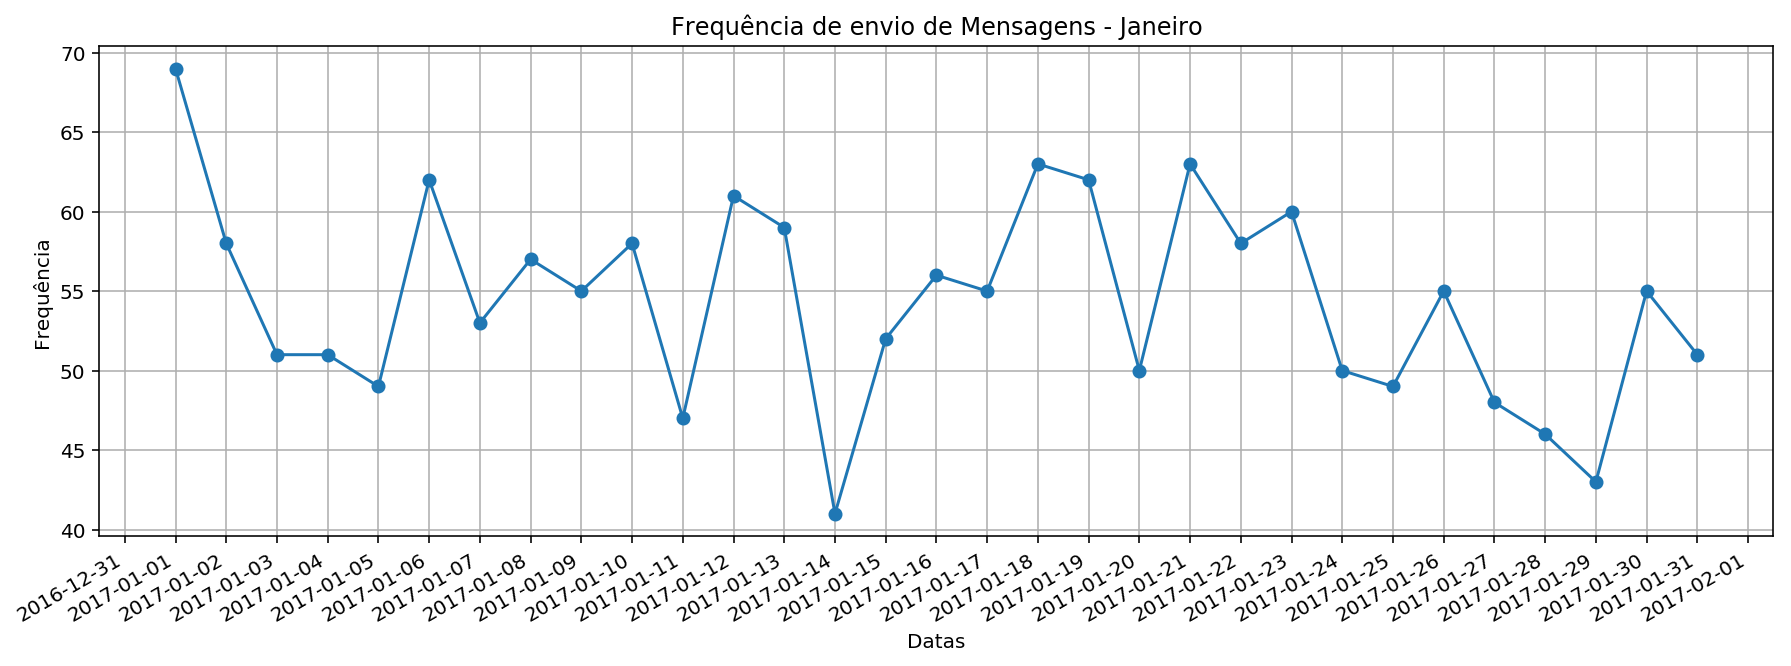

In [22]:
#Gráfico que mostra a frequência por dia
#Mês de Janeiro
freq = Counter(C_Jan)
ocorrencias = []
q_words = []
m=[]
[m.extend([k,v]) for k,v in freq.items()]
for ind in range(len(m)):
    if ind % 2 == 0:
        q_words.append(m[ind])
    else:
        ocorrencias.append(m[ind])
x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in q_words]
y = ocorrencias
plt.figure(figsize=[15,5])
plt.grid()
plt.title("Frequência de envio de Mensagens - Janeiro")
plt.xlabel("Datas")
plt.ylabel("Frequência")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(x,y,linestyle='-',marker='o')
plt.gcf().autofmt_xdate()
plt.show()
plt.close()

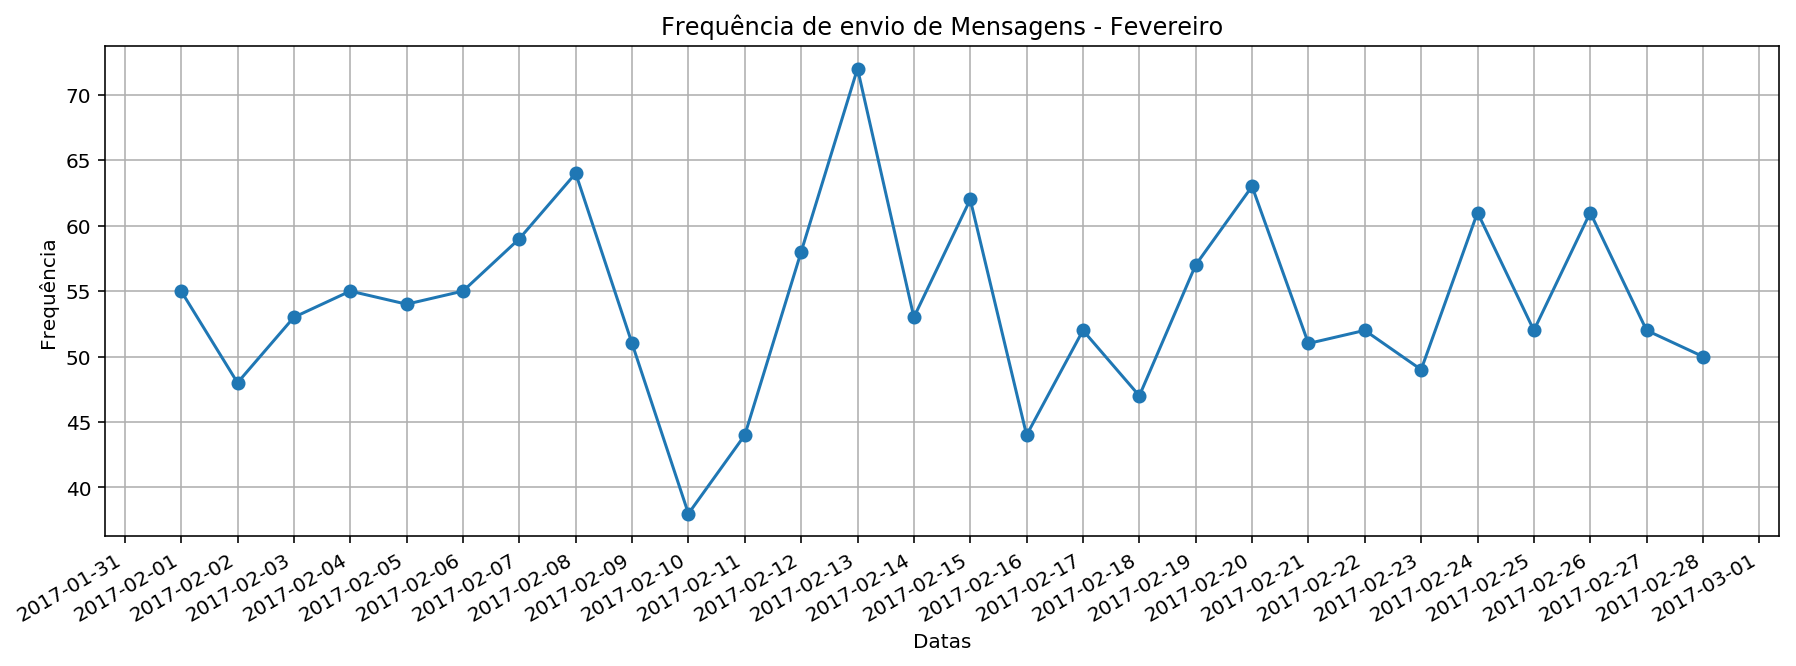

In [23]:
#Gráfico que mostra a frequência por dia
#Mês de Fevereiro
freq = Counter(C_Feb)
ocorrencias = []
q_words = []
m=[]
[m.extend([k,v]) for k,v in freq.items()]
for ind in range(len(m)):
    if ind % 2 == 0:
        q_words.append(m[ind])
    else:
        ocorrencias.append(m[ind])
x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in q_words]
y = ocorrencias
plt.figure(figsize=[15,5])
plt.grid()
plt.title("Frequência de envio de Mensagens - Fevereiro")
plt.xlabel("Datas")
plt.ylabel("Frequência")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(x,y,linestyle='-',marker='o')
plt.gcf().autofmt_xdate()
plt.show()
plt.close()

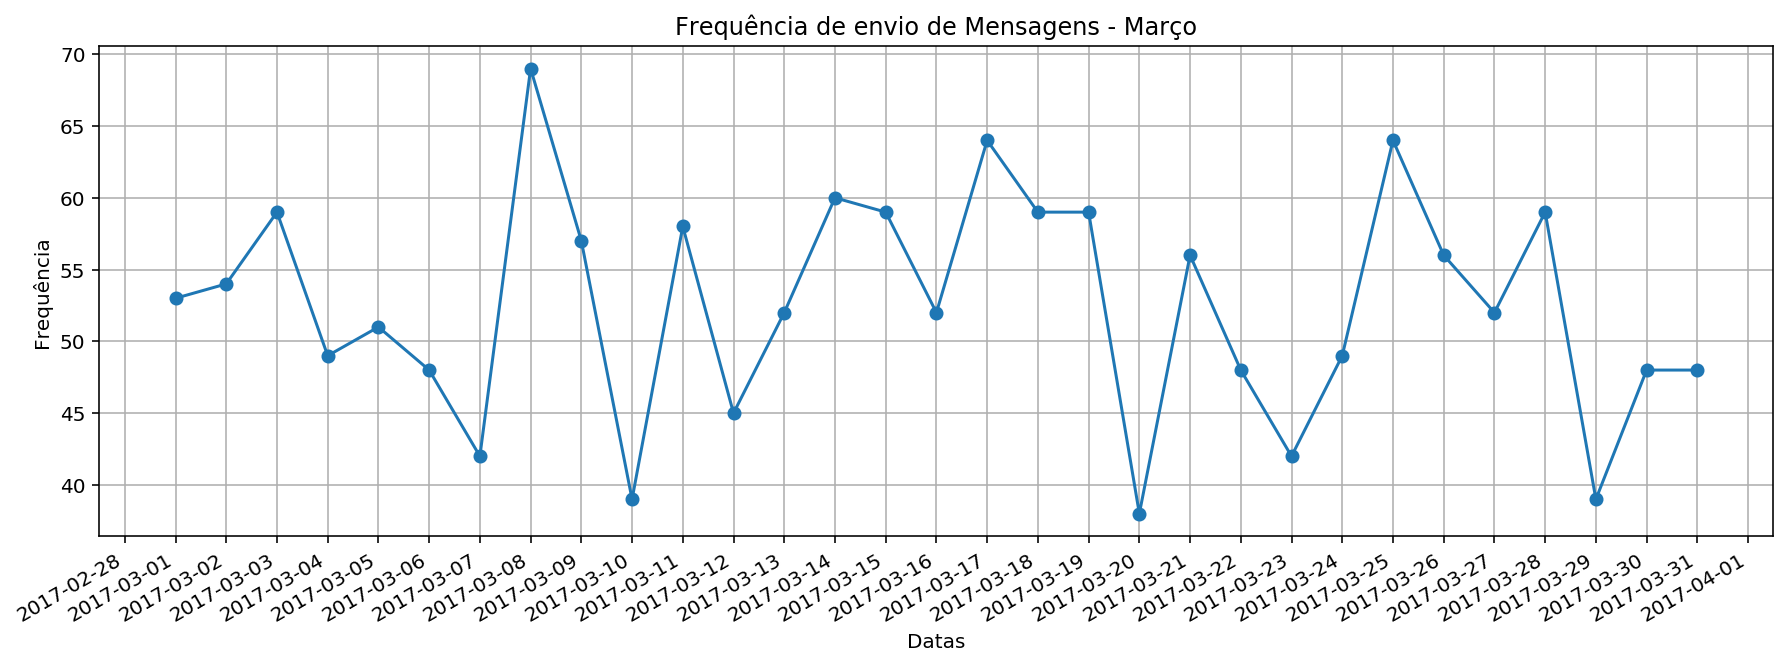

In [24]:
#Gráfico que mostra a frequência por dia
#Mês de Março
freq = Counter(C_Mar)
ocorrencias = []
q_words = []
m=[]
[m.extend([k,v]) for k,v in freq.items()]
for ind in range(len(m)):
    if ind % 2 == 0:
        q_words.append(m[ind])
    else:
        ocorrencias.append(m[ind])
x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in q_words]
y = ocorrencias
plt.figure(figsize=[15,5])
plt.grid()
plt.title("Frequência de envio de Mensagens - Março")
plt.xlabel("Datas")
plt.ylabel("Frequência")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(x,y,linestyle='-',marker='o')
plt.gcf().autofmt_xdate()
plt.show()
plt.close()

In [25]:
#===================================================
#Inicio da Etapa 2
#===================================================
#Pre processamento dos dados
msgs = pd.read_csv("SMS_Senior.csv",encoding = "ISO-8859-1")
mensagens_text = list(msgs['Full_Text'])
mensagens_isspam = msgs['IsSpam'] 
mensagens_filtradas = []
for ind in range(len(mensagens_text)):
    temp = mensagens_text[ind] 
    temp = Pre_Processing_data(temp)
    mensagens_filtradas.append(temp)
print("Finish")

Finish


In [26]:
lista = zip(mensagens_filtradas,mensagens_isspam)
lista_n = list(lista)
train = lista_n[1:4500] #Conjunto de treinamento
test = lista_n[4501:5400] #Conjunto de teste

In [27]:
#Treinamento através do algortimo de Naive Bayes
cl = NaiveBayesClassifier(train)
print("Finish")

Finish


In [28]:
frases = msgs['Full_Text']
frases = list(frases[4501:5000])

In [29]:
#Teste de classificação após o treinamento
fr = Pre_Processing_data("Hello darling, i need to talk to you")
cl.classify("Hello darling, i need to talk to you")

'no'

In [31]:
#Usando o Algoritmo após o treinamento com as mensagens de teste
is_spam_test = []
is_spam_test.append
for ind in range(len(frases)):
    str_temp = frases[ind]
    str_temp = Pre_Processing_data(str_temp)
    is_spam_test.append(cl.classify(str_temp))
print ("Finish")

Finish


In [32]:
#Criação do DataFrame para melhor visualização do resultado
tempa = []
testado = mensagens_isspam[4501:5000]
for ind in range(len(mensagens_isspam)):
    if ind>4500:
        tempa.append(mensagens_isspam[ind])
comparars = pd.DataFrame(frases)
comparars['is_spam_teste'] = pd.DataFrame(is_spam_test)
comparars['Classificado pelo base de dados'] = pd.DataFrame(tempa)
comparars.columns = ['Mensagem','Classificado pelo algoritmo','Classificado pela base de dados']
#Se quiser visualizar todo o conjunto de dados descomente a linha abaixo
#comparars
#E comente a linha abaixo
comparars[15:30]

,Mensagem,Classificado pelo algoritmo,Classificado pela base de dados
15,Tension ah?what machi?any problem?,no,no
16,"Easy mate, * guess the quick drink was bit amb...",no,no
17,But pls dont play in others life.,no,no
18,I had askd u a question some hours before. Its...,no,no
19,Yes i will be there. Glad you made it.,no,no
20,"Do you ever notice that when you're driving, a...",no,yes
21,Hey darlin.. i can pick u up at college if u t...,no,no
22,"You can stop further club tones by replying ""S...",yes,yes
23,Did u download the fring app?,no,no
24,"""GRAN ONLYFOUND OUT AFEW DAYS AGO.CUSOON HONI""",no,no
